In [79]:
import pandas as pd 
import numpy as np 
from scipy.signal import butter, filtfilt, iirnotch
import scipy.signal as signal
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [126]:
test_file= '../signal-processing/openbci-data/raw/.csv'

df = pd.read_table(test_file, header=None)

In [127]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,251.0,-10983.893095,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0
1,252.0,-10944.643431,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0
2,253.0,-10969.252702,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.030,...,240.0,250.0,160.0,31.0,16.0,0.0,0.0,0.0,1.669681e+09,0.0
3,254.0,-11001.148641,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0
4,0.0,-9745.315879,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.064,...,0.0,251.0,96.0,14.0,144.0,0.0,0.0,0.0,1.669681e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,88.0,-8562.260397,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0
2397,89.0,-8551.732725,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0
2398,90.0,-8614.496424,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0
2399,91.0,-8607.589735,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669681e+09,0.0


In [128]:
data = df[1]

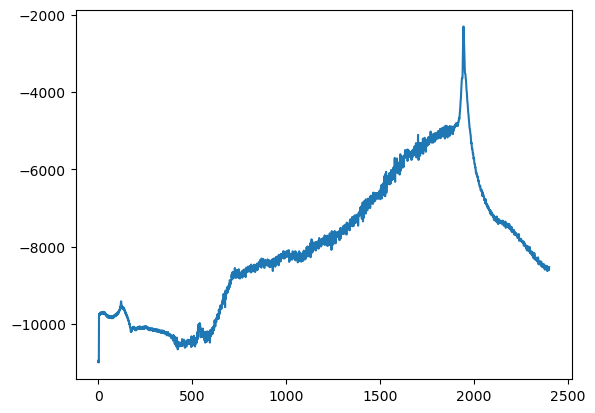

In [129]:
plt.plot(data)

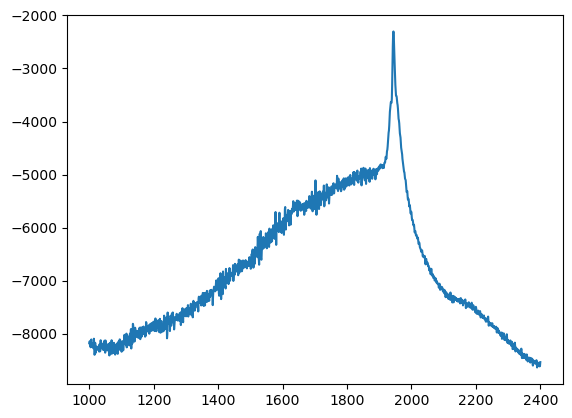

In [130]:
plt.plot(data[1000:])

## Filtering

- DC offset filtering: https://stackoverflow.com/questions/20948111/how-can-i-remove-a-wandering-dc-offset-from-an-audio-clip


In [134]:
def filter_data(data, fs=250, bandpass_filter=[10,500], notch_f0 = 60, Q = 100):
  nyq = 0.5*fs
  order = 4
  
  # remove dc offset 
  b,a = butter(2, 1/(250/2), 'highpass')
  y = filtfilt(b,a,data)

  bandpass_filter = [i/nyq for i in bandpass_filter]
  b, a = butter(order, bandpass_filter, fs=fs, btype = 'bandpass')
  y = filtfilt(b, a, y)

  b_notch, a_notch = iirnotch(notch_f0, Q, fs)
  y = filtfilt(b_notch, a_notch, y)

  # b_notch, a_notch = iirnotch(50, Q, fs)
  # y_notch = filtfilt(b_notch, a_notch, y_notch)

  return y

In [135]:
y = filter_data(data[1000:])

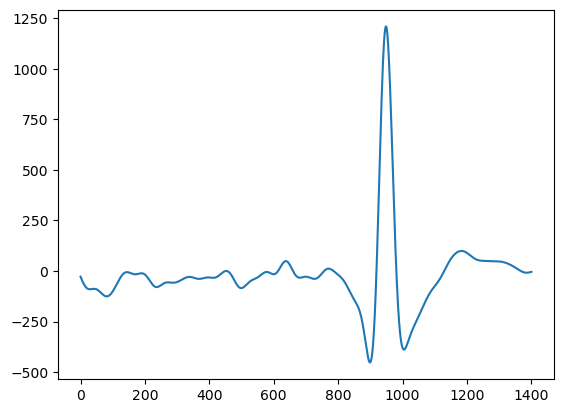

In [136]:
plt.plot(y)

In [8]:
# rectify EMG signal
absSignal = np.absolute(y)
timeAbs=np.linspace(0, len(absSignal)/250, num=len(absSignal))

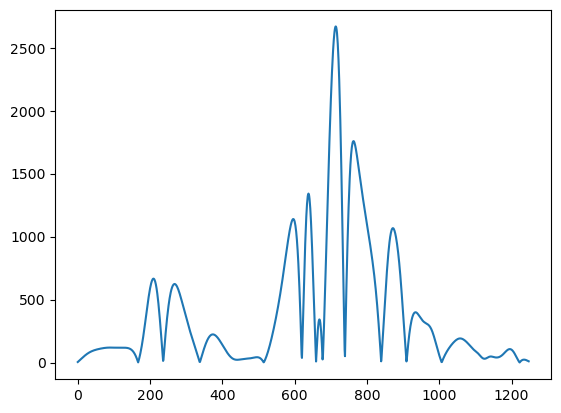

In [9]:
plt.plot(absSignal)

In [10]:
from src.analyze.emg_processing import analyzeEMG
# result_dict = analyzeEMG(y, 250, False)
# result_dict

In [19]:
result_dict = analyzeEMG(y, 250, False)
result_dict

/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF


{'TimeDomain': {'IEMG': 491035.58951495757,
  'MAV': 393.4580044190365,
  'MAV1': 348.1560392149253,
  'MAV2': 323.55351854663826,
  'SSI': 517185686.90778625,
  'VAR': 414743.9349701574,
  'TM3': 231816590.25839984,
  'TM4': 1229755760599.1453,
  'TM5': 1786337199490510.5,
  'LOG': 7.52731654708396e+170,
  'RMS': 643.7480936664493,
  'WL': 21325.321186611975,
  'AAC': 17.08759710465703,
  'DASDV': 1048.005668362429,
  'AFB': -0.04706025809794043,
  'ZC': 12,
  'MYOP': 1.0,
  'WAMP': 649,
  'SSC': 9},
 'FrequencyDomain': {'MNF': 1.7569981977195588,
  'MDF': 2.9296875,
  'PeakFrequency': 0.9765625,
  'MNP': 6042.01825773395,
  'TTP': 779420.35524768,
  'SM1': 1369440.159436112,
  'SM2': 256393856317.14468,
  'SM3': 6.168164286361356e+16,
  'FR': inf,
  'PSR': 91525.8299574338,
  'VCF': 328951.4425521745}}

In [20]:
df_td = pd.DataFrame(result_dict['TimeDomain'], index=[0])
df_td

,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,AFB,ZC,MYOP,WAMP,SSC
0,491035.589515,393.458004,348.156039,323.553519,5.171857e+08,414743.93497,2.318166e+08,1.229756e+12,1.786337e+15,7.527317e+170,643.748094,21325.321187,17.087597,1048.005668,-0.04706,12,1.0,649,9


In [21]:
df_fd = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
df_fd

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF
0,1.756998,2.929688,0.976562,6042.018258,779420.355248,1.369440e+06,2.563939e+11,6.168164e+16,inf,91525.829957,328951.442552


## Get DataFrame results for all files

In [22]:
import os 

data_dir = './openbci-data/raw/'

In [48]:
save_dir = './openbci-data/results/'
save_tdfile = 'td.csv'
save_fdfile = 'fd.csv'

In [72]:
import os 
for subdir, dirs, files in os.walk(data_dir):
    counter = 0
    for file in files: 
        if os.path.join(subdir, file).endswith('csv'): 
            df = pd.read_table(subdir+file, header=None)
            data = df[1]
            y = filter_data(data[250:])
            result_dict = analyzeEMG(y, 250, False)
            df_td = pd.DataFrame(result_dict['TimeDomain'], index=[0])
            df_fd = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
            df_td['File'] = file[:-4]
            df_fd['File'] = file[:-4]
            plt.plot(y)
            plt.savefig('./openbci-data/pics/'+file[:-3])
            plt.close()
            if counter == 0: 
                df_td.to_csv((save_dir+save_tdfile), index=False, mode='a');
                df_fd.to_csv((save_dir+save_fdfile), index=False, mode='a');
            else: 
                df_td.to_csv((save_dir+save_tdfile), index=False, header=False, mode='a');
                df_fd.to_csv((save_dir+save_fdfile), index=False, header=False, mode='a');
        counter += 1

/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF


## Read full processed results

In [77]:
df_tdres = pd.read_csv('./openbci-data/results/td.csv')
df_tdres.sort_values('File')

,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,AFB,ZC,MYOP,WAMP,SSC,File
2,4.854577e+05,405.223428,361.090905,335.145803,5.162468e+08,4.312839e+05,2.444595e+08,1.282959e+12,1.872290e+15,9.689442e+175,656.447950,21290.576908,17.771767,1091.674762,0.078275,12,1.000000,622,7,1
4,1.163419e+06,475.641377,447.671936,392.949448,4.310970e+09,1.763178e+06,9.395858e+08,5.917880e+13,2.178603e+16,3.701906e+206,1327.575695,49597.681054,20.277057,3955.095749,0.198243,25,0.999182,1294,16,2
3,8.933197e+04,45.346176,42.315412,36.235731,1.566128e+07,7.953927e+03,1.440902e+06,9.273640e+08,3.453526e+11,4.938486e+19,89.162153,3540.023221,1.796966,15.157815,0.401906,23,0.999492,986,13,3
1,1.517829e+04,6.642576,5.178286,3.875829,2.015941e+05,8.826361e+01,2.516167e+01,3.330174e+04,5.624722e+04,7.670686e+02,9.392815,943.879429,0.413076,0.372821,0.102415,42,0.998249,1046,29,4
0,4.953478e+03,6.040826,4.237560,3.499826,6.811314e+04,8.316622e+01,1.689152e+03,4.187046e+04,1.131961e+06,4.202402e+02,9.113989,114.171594,0.139234,0.075176,0.803151,5,0.996341,318,3,5


In [78]:
df_fdres = pd.read_csv('./openbci-data/results/fd.csv')
df_fdres.sort_values('File')

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF,File
2,1.626987,1.953125,0.976562,6161.705261,7.948600e+05,1.293227e+06,2.328659e+11,5.275085e+16,inf,145218.255781,2.929621e+05,1
4,1.651151,2.929688,0.976562,22174.663453,2.860532e+06,4.723171e+06,3.499782e+12,3.209377e+18,inf,107786.812234,1.223470e+06,2
3,1.582231,2.929688,0.976562,101.525533,1.309679e+04,2.072215e+04,8.870295e+07,4.514134e+11,inf,925523.309481,6.770372e+03,3
1,2.295826,2.929688,1.953125,1.023929,1.320869e+02,3.032484e+02,1.111430e+04,5.029446e+05,inf,20634.681117,7.887309e+01,4
0,1.441167,1.953125,0.976562,0.294378,3.797481e+01,5.472803e+01,5.490008e+02,7.320813e+03,inf,120470.956196,1.238001e+01,5
